In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install pymongo

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 13.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 307.7/307.7 kB 18.9 MB/s eta 0:00:00


In [ ]:
pip install geojson

In [ ]:
from google.colab import files
import geojson
import json

In [ ]:
# instead of manual upload
upload = files.upload()

Saving NortheastQuadrant.geojson to NortheastQuadrant.geojson
Saving NorthwestQuadrant.geojson to NorthwestQuadrant.geojson
Saving SoutheastQuadrant.geojson to SoutheastQuadrant.geojson
Saving SouthwestQuadrant.geojson to SouthwestQuadrant.geojson


In [ ]:
#combine geojson files
def combine_geojson(files):
  features = []
  for file in files:
    with open(file, 'r') as f:
      data = geojson.load(f)
      features.extend(data['features'])
  combined=geojson.FeatureCollection(features)
  return combined

In [ ]:
filenames = list(upload.keys())

In [ ]:
combinedfiles = combine_geojson(filenames)

In [ ]:
with open('combined_bangalore_roads.geojson', 'w') as f:
  geojson.dump(combinedfiles, f)

In [ ]:
files.download('combined_bangalore_roads.geojson')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
!pip install folium

Connected to MongoDB Atlas successfully!
Total number of roads: 212139
Number of roads with poor surface types: 7553
Number of roads with low smoothness ratings: 113
Number of roads with low smoothness ratings: 80
Roads with poor surface types:
Kariyammana Agrahara Road
Kariyammana Agrahara Road
Kariyammana Agrahara Road
1st Cross Road
13th Cross Road
WASA Layout 3rd Cross road
5th Cross, Ambedkar Colony
WASA Layout 2nd Cross road
4th Cross Road
Gururaj Layout, 5th Cross road
WASA Layout 4th Cross road
Sheelavanthana Kere Walking Track
5th Main Road
Good Hope Street
4th Cross Road
Sacred Heart Road
Sacred Heart Road
3rd Cross Road
2nd Cross Road
1st Cross Road
Short cut
BWSSB Pipeline Track
1st Rayara Raste
Rangarao road
Pipeline Road
Pipeline Road
Pipeline Road
2nd Cross Road
BWSSB Pipeline Track
BWSSB Pipeline Track
6th Cross
Cubbon Park Nature Trail
Cubbon Park Nature Trail
Parkia Path
CiSTUP Internal Road
14th Cross Road
5th B Cross Road
6th Cross Road (Leela Palace Road)
4th Cross

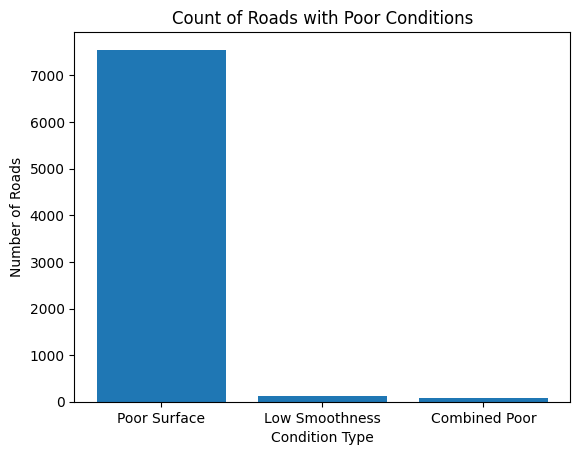

In [ ]:
from pymongo import MongoClient
import geojson
import folium
import pandas as pd
import matplotlib.pyplot as plt

# Connect to MongoDB
connection_string = "Your connection string."
client = MongoClient(connection_string)

try:
    db = client['road_analysis']
    road_collection = db['roads']
    # accident_collection = db['accidents']

    print("Connected to MongoDB Atlas successfully!")

    # # Load GeoJSON data
    # with open('combined_bangalore_roads.geojson', 'r') as f:
    #     data = geojson.load(f)
    #     road_collection.insert_many(data['features'])
    #     print("Loaded road data into MongoDB")

    # # Example accident data (replace with actual data)
    # accident_data = [
    #     {"location": {"type": "Point", "coordinates": [77.5946, 12.9716]}, "date": "2023-06-01", "severity": "fatal"},
    #     {"location": {"type": "Point", "coordinates": [77.6067, 12.9795]}, "date": "2023-06-02", "severity": "serious"}
    # ]
    # accident_collection.insert_many(accident_data)
    # print("Loaded accident data into MongoDB")

    # Find total number of roads
    total_roads_count = road_collection.count_documents({})
    print(f"Total number of roads: {total_roads_count}")

    # Find roads with poor surface types
    poor_surface_roads = road_collection.find({
        "properties.surface": {"$in": ["dirt", "gravel", "unpaved", "sand", "mud","concrete:plates"]},
        "properties.highway": {"$ne": ["pedestrian"]}
    })
    poor_surface_roads_count = road_collection.count_documents({
        "properties.surface": {"$in": ["dirt", "gravel", "unpaved", "sand", "mud","concrete:plates"]},
        "properties.highway": {"$ne": ["pedestrian"]}
    })
    print(f"Number of roads with poor surface types: {poor_surface_roads_count}")

    # Find roads with low smoothness ratings
    low_smoothness_roads = road_collection.find({
        "properties.smoothness": {"$in": ["bad", "very_bad", "horrible", "very_horrible", "impassable"]},
        "properties.highway": {"$ne": ["pedestrian"]}
    })
    low_smoothness_roads_count = road_collection.count_documents({
        "properties.smoothness": {"$in": ["bad", "very_bad", "horrible", "very_horrible", "impassable"]},
        "properties.highway": {"$ne": ["pedestrian"]}
    })
    print(f"Number of roads with low smoothness ratings: {low_smoothness_roads_count}")

    # Extract road names
    poor_surface_road_names = [road['properties'].get('name') or road['properties'].get('alt_name','Unnamed') for road in poor_surface_roads]
    low_smoothness_road_names = [road['properties'].get('loc_name') or road['properties'].get('name','Unnamed') for road in low_smoothness_roads]

    # Find roads with both poor surface and low smoothness
    combined_poor_roads = road_collection.find({
        "properties.surface": {"$in": ["dirt", "gravel", "unpaved", "sand", "mud","compacted","concrete:plates","asphalt","ground","concrete"]},
        "properties.smoothness": {"$in": ["bad", "very_bad", "horrible", "very_horrible", "impassable"]},
        "properties.highway": {"$ne": ["pedestrian"]}
    })
    combined_poor_road_count=road_collection.count_documents({
        "properties.surface": {"$in": ["dirt", "gravel", "unpaved", "sand", "mud","compacted","concrete:plates","asphalt","ground","concrete"]},
        "properties.smoothness": {"$in": ["bad", "very_bad", "horrible", "very_horrible", "impassable"]},
        "properties.highway": {"$ne": ["pedestrian"]}
    })
    print(f"Number of roads with low smoothness ratings: {combined_poor_road_count}")
    combined_poor_road_names = [road['properties'].get('name', 'Unnamed') for road in combined_poor_roads]

    print("Roads with poor surface types:")
    for name in poor_surface_road_names:
      if(name!="Unnamed"):
        print(name)

    print("\nRoads with low smoothness ratings:")
    for name in low_smoothness_road_names:
      if(name!="Unnamed"):
        print(name)

    print("\nRoads with both poor surface and low smoothness ratings:")
    for name in combined_poor_road_names:
      if(name!="Unnamed"):
        print(name)

    # Visualization
    m = folium.Map(location=[12.9716, 77.5946], zoom_start=12)

    # # Add all accidents to the map
    # for accident in accident_collection.find({}):
    #     coordinates = accident['location']['coordinates']
    #     folium.Marker(location=[coordinates[1], coordinates[0]], popup=accident['severity'], icon=folium.Icon(color='red')).add_to(m)

    # Highlight poor surface roads in red
    for road in road_collection.find({
        "properties.surface": {"$in": ["dirt", "gravel", "unpaved", "sand", "mud","concrete:plates"]}
    }):
        coordinates = road['geometry']['coordinates']
        if road['geometry']['type'] == 'LineString':
            folium.PolyLine(locations=[(lat, lon) for lon, lat in coordinates], color='red').add_to(m)
        elif road['geometry']['type'] == 'Polygon':
            folium.Polygon(locations=[(lat, lon) for lon, lat in coordinates[0]], color='red').add_to(m)

    # Highlight low smoothness roads in orange
    for road in road_collection.find({
        "properties.smoothness": {"$in": ["bad", "very_bad", "horrible", "very_horrible", "impassable"]}
    }):
        coordinates = road['geometry']['coordinates']
        if road['geometry']['type'] == 'LineString':
            folium.PolyLine(locations=[(lat, lon) for lon, lat in coordinates], color='orange').add_to(m)
        elif road['geometry']['type'] == 'Polygon':
            folium.Polygon(locations=[(lat, lon) for lon, lat in coordinates[0]], color='orange').add_to(m)

    # Highlight combined poor roads in purple
    for road in road_collection.find({
        "properties.surface": {"$in": ["dirt", "gravel", "unpaved", "sand", "mud","compacted","concrete:plates","asphalt","ground","concrete"]},
        "properties.smoothness": {"$in": ["bad", "very_bad", "horrible", "very_horrible", "impassable"]}
    }):
        coordinates = road['geometry']['coordinates']
        if road['geometry']['type'] == 'LineString':
            folium.PolyLine(locations=[(lat, lon) for lon, lat in coordinates], color='purple').add_to(m)
        elif road['geometry']['type'] == 'Polygon':
            folium.Polygon(locations=[(lat, lon) for lon, lat in coordinates[0]], color='purple').add_to(m)

    # Save map to an HTML file
    m.save('bangalore_roads.html')
    print("Map saved to 'bangalore_roads.html'")

    # # Summary statistics
    # all_roads = list(road_collection.find({}))
    # df = pd.DataFrame(all_roads)
    # print("Summary statistics of the road dataset:")
    # print(df.describe())

    # Plotting road conditions
    condition_counts = {
        "Poor Surface": poor_surface_roads_count,
        "Low Smoothness": low_smoothness_roads_count,
        "Combined Poor": len(combined_poor_road_names)
    }
    plt.bar(condition_counts.keys(), condition_counts.values())
    plt.title("Count of Roads with Poor Conditions")
    plt.xlabel("Condition Type")
    plt.ylabel("Number of Roads")
    plt.show()

except Exception as e:
    print("Error:", str(e))
